<a href="https://colab.research.google.com/github/ArashdeepKaurV/HOMEWORK/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy==1.25.2 pandas==2.2.2 matplotlib==3.8.0 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 95.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fh = pd.read_csv('foodhub_order.csv.xls')
print(fh.head())

   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24  


In [ ]:
#how many rows and columns are present in the data?

print(fh.shape)

(1898, 9)


In [ ]:
#what are the datatypes of the different columns in the dataset?
#(The info()function can be used)

print(fh.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


In [ ]:
#Are there any missing values in the data?
#if yes, treat them using an appropriate method.

print("Are there any missing values in the data:", fh.isnull().values.any())

Are there any missing values in the data: False


In [ ]:
#check the statistical summary of the data. What is the minimum, average and maximum
#time it takes for food to be prepared once an order is placed?

min_prep = fh['food_preparation_time'].min()
print("Minimum time it takes to prepare an order once its places is"," ", min_prep)
avg_prep = fh['food_preparation_time'].mean()
print("Average time it takes to prepare an order once its places is"," ", avg_prep)
max_prep = fh['food_preparation_time'].max()
print("Maximum time it takes to prepare an order once its places is"," ", max_prep)

Minimum time it takes to prepare an order once its places is   20
Average time it takes to prepare an order once its places is   27.371970495258168
Maximum time it takes to prepare an order once its places is   35


In [ ]:
#How many orders are not rated?

not_rated = (fh['rating'] == "Not given").sum()

print("Orders not rated:",not_rated)

Orders not rated: 736


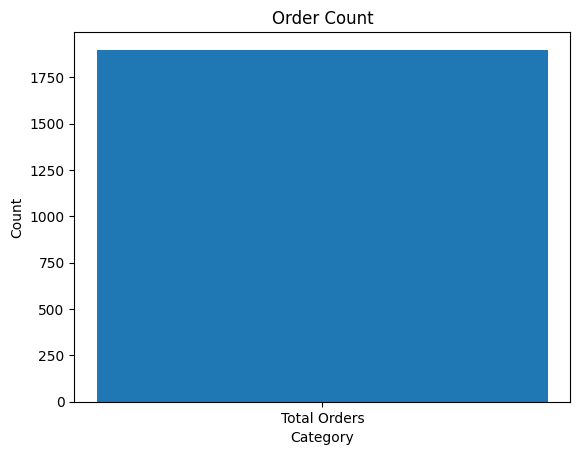

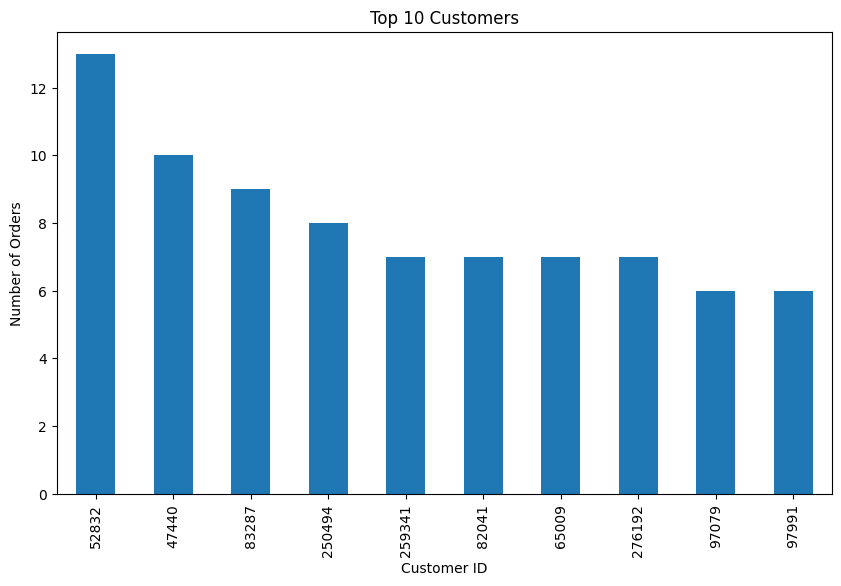

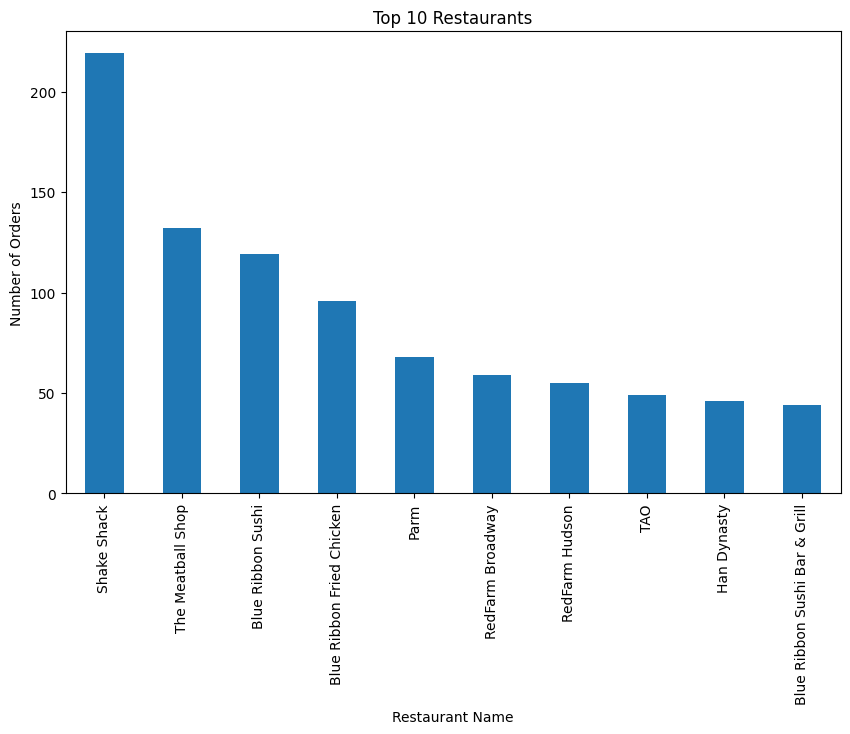

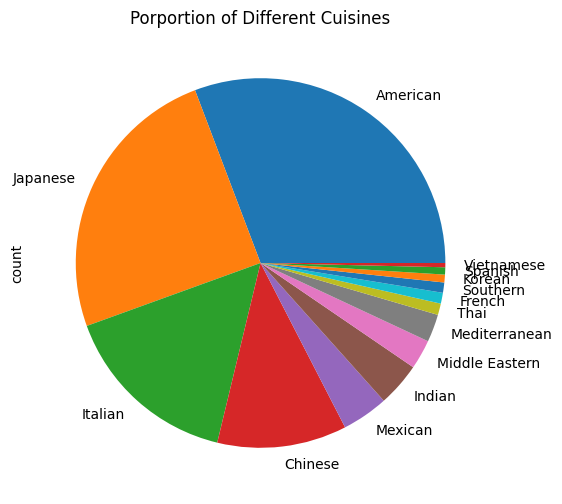

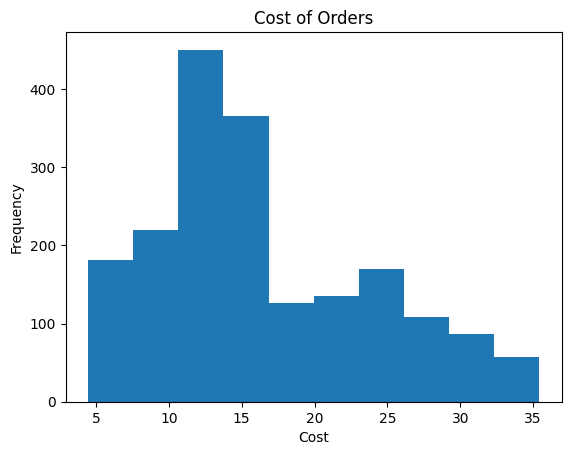

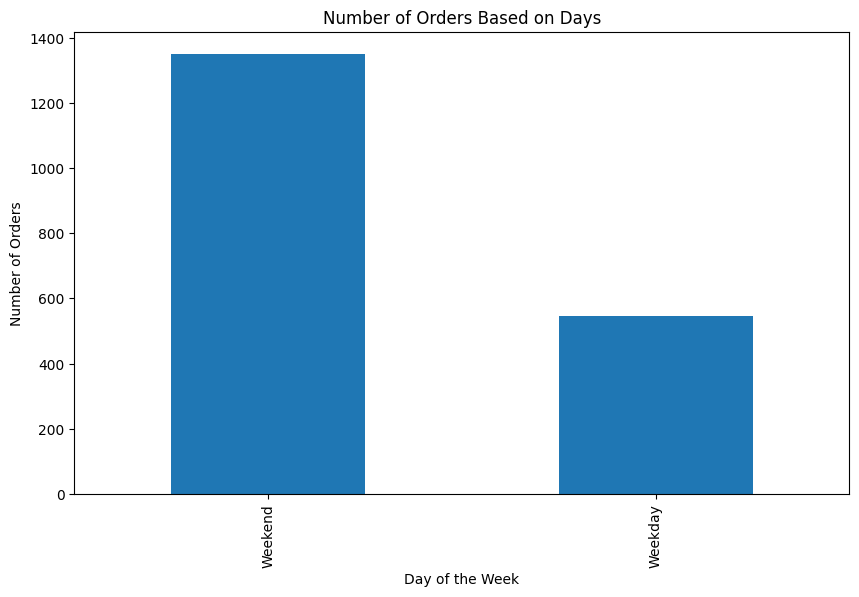

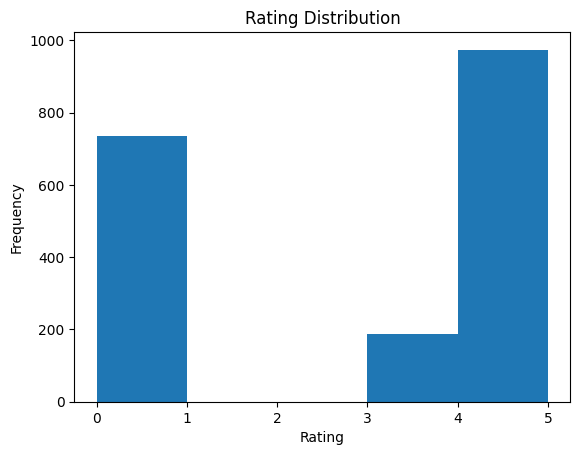

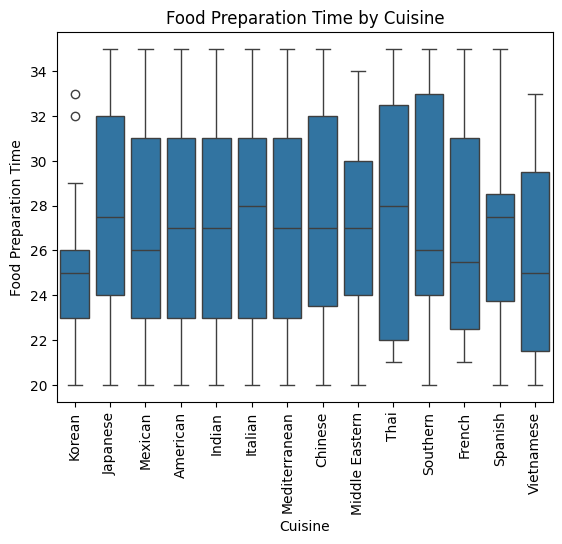

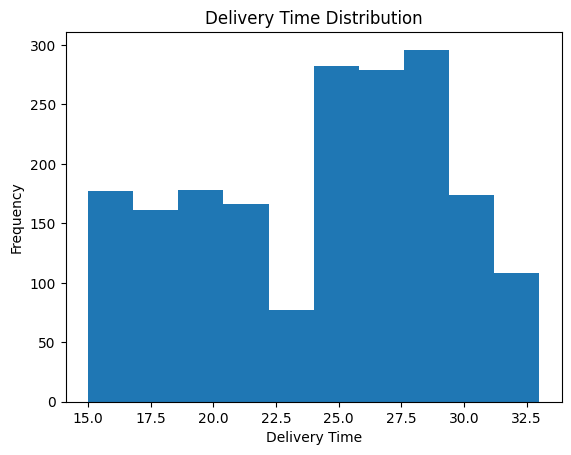

In [57]:
#Explore all the variables and provide observations on their distributions (generally, histograms, boxplots, countplots, etc)
#are used for univariate explorations.)

#order count plot
plt.bar(['Total Orders'],[len(fh['order_id'])])
plt.title('Order Count')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

#top 10 customers
top_customer = fh['customer_id'].value_counts().nlargest(10)
top_customer.plot(kind='bar',figsize=(10,6))
plt.title('Top 10 Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.show()

#top 10 restaurants
top_restaurant = fh['restaurant_name'].value_counts().nlargest(10)
top_restaurant.plot(kind='bar',figsize=(10,6))
plt.title('Top 10 Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.show()

#porportion of different cuisines
cuisine = fh['cuisine_type'].value_counts()
cuisine.plot(kind='pie',figsize=(10,6))
plt.title('Porportion of Different Cuisines')
plt.show()

#cost of orders
plt.hist(fh['cost_of_the_order'],bins=10)
plt.title('Cost of Orders')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

#Number of orders based on days
day_order = fh['day_of_the_week'].value_counts()
day_order.plot(kind='bar',figsize=(10,6))
plt.title('Number of Orders Based on Days')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

#rating visual
plt.hist(fh['rating'],5)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#food preparation box plot
sns.boxplot(x=fh['cuisine_type'], y=fh['food_preparation_time'])
plt.title('Food Preparation Time by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Food Preparation Time')
plt.xticks(rotation=90)
plt.show()

#delivery time
plt.hist(fh['delivery_time'],bins=10)
plt.title('Delivery Time Distribution')
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Which are the top 5 restaurants in terms of the number of orders received?

top_5 = fh.groupby('restaurant_name')['order_id'].nunique().nlargest(5).reset_index(name="Order_Count")

print(top_5)



             restaurant_name  Order_Count
0                Shake Shack          219
1          The Meatball Shop          132
2          Blue Ribbon Sushi          119
3  Blue Ribbon Fried Chicken           96
4                       Parm           68


In [ ]:
#which is the most popular cuisine on weekends

popular_weekend_cuisine = fh[fh['day_of_the_week'] == "Weekend"]['cuisine_type'].value_counts().idxmax()

print("Most popular cuisine on weekends is", popular_weekend_cuisine)

Most popular cuisine on weekends is American


In [ ]:
#What percentage of the orders cost more than 20 Dollars?

Percent_above20 = (fh['cost_of_the_order']>20).mean()*100

print("Percanetage of orders that cost more than 20 Dollars:", Percent_above20)

Percanetage of orders that cost more than 20 Dollars: 29.24130663856691


In [ ]:
#What is the mean order delivery time?

mean_delivery_time = fh['delivery_time'].mean()

print("Mean order delivery time is", mean_delivery_time)

Mean order delivery time is 24.161749209694417


In [ ]:
#The company has decided to give 20% discount vouchers to the top 3 most frequent customers. find the ID's of these customers and the number of orders they placed.

top_3_customers = fh['customer_id'].value_counts().nlargest(3)

print("Top 3 most frequent customers:")
print(top_3_customers)

Top 3 most frequent customers:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


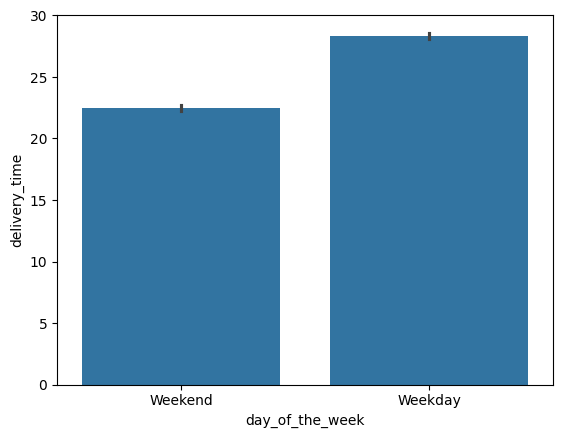

In [ ]:
#Perform a multivariate analysis to explore relationships between the important variables in the dataset.(it is a good idea to explore relationships between numerical and categorical variables)

sns.barplot(x='day_of_the_week', y='delivery_time', data=fh)
plt.show()

In [ ]:
#The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurant must have rating count of more than 50 and the average ratings should be greater than 4. find the restaurants fulfilling the criteria to get the promotional offer.
#The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurant must have rating count of more than 50 and the average ratings should be greater than 4. find the restaurants fulfilling the criteria to get the promotional offer.

fh['rating'] = fh['rating'].replace('Not given', 0)
fh['rating'] = fh['rating'].astype(int)

rating_stats = fh.groupby('restaurant_name')['rating'].agg(rating_count=('count'),avg_rating=('mean'))
High_rated_restaurants = rating_stats[(rating_stats['rating_count'] > 50) & (rating_stats['avg_rating'] > 4)]
High_rated_restaurants_list = High_rated_restaurants.index.tolist()

print("Restaurants fulfilling the criteria to get the promotional offer:")
print(High_rated_restaurants_list)

Restaurants fulfilling the criteria to get the promotional offer:
[]
restaurant_name
'wichcraft          False
12 Chairs           False
5 Napkin Burger     False
67 Burger           False
Alidoro             False
                    ...  
Zero Otto Nove      False
brgr                False
da Umberto          False
ilili Restaurant    False
indikitch           False
Name: rating_count, Length: 178, dtype: bool


In [ ]:
#The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the order having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

fh['revenue'] = 0.0
fh.loc[fh['cost_of_the_order'] > 20, 'revenue'] = 0.25 * fh['cost_of_the_order']
fh.loc[fh['cost_of_the_order'] > 5, 'revenue'] += 0.15 * fh['cost_of_the_order']

total_revenue = fh['revenue'].sum()

print("Net revenue generated by the company is $", total_revenue)


Net revenue generated by the company is $ 8379.539499999999


In [ ]:
#The company wants to analyze the total time required to deliver the food. What percenatage of the orders take more than 60 minutes to get delivered from the time the order is placed? (the food has to be prepared and then delivered.)

fh['Total_time'] = fh['food_preparation_time']+fh['delivery_time']
percenatge_higher_than_60 = (fh['Total_time']>60).mean()*100

print("Percentage of orders that take more than 60 minutes to get delivered:", percenatge_higher_than_60)

Percentage of orders that take more than 60 minutes to get delivered: 10.537407797681771


In [ ]:
#The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekdns?

mean_delivery_time  = fh.groupby('day_of_the_week')['delivery_time'].mean()

print("Mean delivery time during weekdays and weekends:")
print(mean_delivery_time)

Mean delivery time during weekdays and weekends:
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#Conclusion and recommendations.
- Majority of the orders are placed over the weekend yet the delivery time for the orders placed during the weekday is longer. To resolve this issue I recommend hiring more delivery employees.
- Second issue that I noticed is that none of the restaurants qualified for the companys promotional offer. To resolve this issue I recommend lowering the amount of reviews a restaurant received to 20 instead of 50.